![](http://rentinginla.com/wp-content/uploads/2015/12/Buying.jpg)
# [Project 2: Predicting House Prices with Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

The goal of this project is for you to use EDA, visualization, data cleaning, preprocesing, and linear models to predict home prices given the features of the home, and interpret your linear models to find out what features add value to a home! This project is a bit more open-ended than project 1. 

Be sure to ...

* Think about your choices when it comes to your choices about the data. Be ready to defend your decisions!
* Use lots of plots to dig deeper into the data! Describe the plots and convey what you learned from them.
* Don't forget to read the [description of the data](../data_description.txt) (also available at the kaggle website)! This has valuable information that will help you clean and impute data. `NaN` means something in many of the columns! Don't just drop or fill them!
* Try fitting many models! Document your work and note what you've tried.
* Apply what you've learned in class, books, videos, Kaggle forums, and blog posts. There have been a TON of blog posts about this;  you should seek them out and read them!


From the Kaggle competition website:

    Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

    With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.


In this notebook, I plan to show how to clean, explore, analyze and predict home prices based on permanent house qualities. I used only Linearrgression using total home sqrft ratio with overall qaulity of the house 

This notebook uses [data from Kaggle](https://www.kaggle.com/c/dsi-us-4-project-2-regression-challenge/data).

This is the final submitted [submitted  to Kaggle](https://www.kaggle.com/c/dsi-us-4-project-2-regression-challenge/leaderboard). 

In [1]:
# This file provide a basic exploration of ames house price dataset
# import necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
import scipy.stats
from patsy import dmatrices
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import metrics
import sqlite3
import os 
import csv
# Configure visual settings:
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.style.use('ggplot')
np.random.seed(2018)
%load_ext autoreload
%autoreload 2
sns.set()

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Loading the data and EDA


* The data comes in three separate CSVs located in `../data/`. 
* Load the CSV into a `DataFrame`. 
* Make sure to check the `.head` or `.sample`. How many rows? How many columns?
* Familiarize yourself with the column names and what they represent.
* Is there a column that can be set as the `index`? If so, set that column as the index when loading the data. (`df.set_index()`)

### A. Data Types

Read the data description on Kaggle. Which variables are numerical and categorical? Are there any columns that can be deleted? 

Make sure the `dtype` of each column is correct. 

**NOTE:** There is one column in particular that should be categorical but will load in pandas as numeric.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.pipeline import Pipeline, FeatureUnion # These ones are new!
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer, Imputer

%matplotlib inline

sns.set_style('darkgrid')

##  Reading in the data 

In [3]:
train = pd.read_csv('./data/train.csv')
train.head()[:2]

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [4]:
test = pd.read_csv('./data/test.csv')
test.head()[:2]

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD


In [5]:
print('Train Data: \n')
print("Number of columns: "+ str(train.shape[1]))
print("Number of rows: "+ str(train.shape[0]))
print('\nTest Data: \n')
print("Number of columns: "+ str(test.shape[1]))
print("Number of rows: "+ str(test.shape[0]))

Train Data: 

Number of columns: 81
Number of rows: 2051

Test Data: 

Number of columns: 80
Number of rows: 879


### Basic EDA 

In [6]:
#descriptive statistics summary
train['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [7]:
# First I want the column names to be uniformly formatted just for consistency.
train.rename(columns= {col: col.lower().replace(' ','_') for col in train.columns}, inplace=True)
test.rename(columns= {col: col.lower().replace(' ','_') for col in test.columns}, inplace=True)

For this run through, I want to keep it as basic and logical as possible.
So I think I'm going to think about land (lot_area) + building_area (grlivarea + total_bsmt_sf + garage_area), location (neighborhood and zoning), and hyperized total quality.

If that's not great, then I'll add in my idea for 'new house' and 'remodeled' features

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


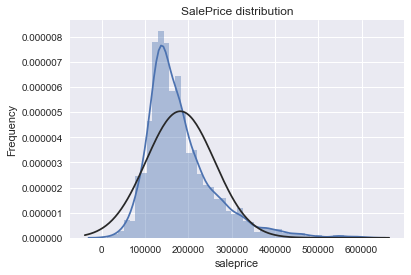

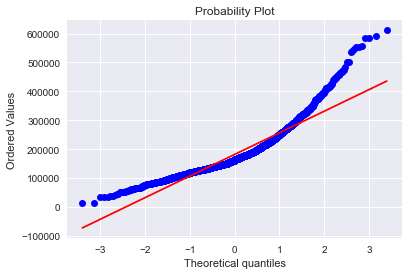

In [8]:
# Kernel Density Plot
from scipy.stats import norm
from scipy import stats
sns.distplot(train.saleprice,fit=norm);
plt.ylabel('Frequency')
plt.title('SalePrice distribution');
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['saleprice']);
# QQ-plot
fig = plt.figure()
res = stats.probplot(train['saleprice'], plot=plt)
plt.show()

The target variable is right skewed(positive skewness) and show peakedness. As (linear) models fits better on  normally distributed data , we require proper transformation.

    1. Transform the skewed numeric features by taking log(feature + 1) - to make features more normal
    
##### Transformation Performed after univariate analysis    

## Relation Exploration for Few Numerical Variables

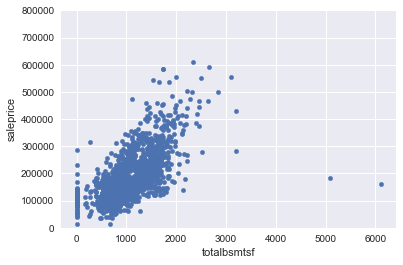

In [9]:
#scatter plot totalbsmtsf/saleprice
var = 'totalbsmtsf'
data = pd.concat([train['saleprice'], train[var]], axis=1)
data.plot.scatter(x=var, y='saleprice', ylim=(0,800000));

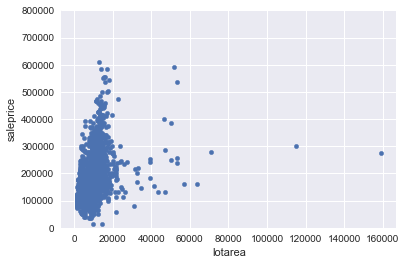

In [10]:
#scatter plot LotArea/saleprice
var = 'lotarea'
data = pd.concat([train['saleprice'], train[var]], axis=1)
data.plot.scatter(x=var, y='saleprice', ylim=(0,800000));

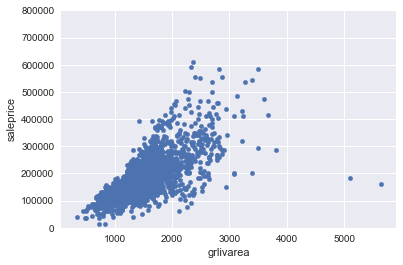

In [11]:
#scatter plot grlivarea/saleprice
var = 'grlivarea'
data = pd.concat([train['saleprice'], train[var]], axis=1)
data.plot.scatter(x=var, y='saleprice', ylim=(0,800000));

In [12]:
#Deleting outliers
train = train.drop(train[(train['grlivarea']>4000) & (train['saleprice']<300000)].index)

'TotalBsmtSF','LotArea' and 'GrLivArea' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF' and 'LotArea' we can see that the slope of the linear relationship are particularly high.

## Relation Exploration for categorical features

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


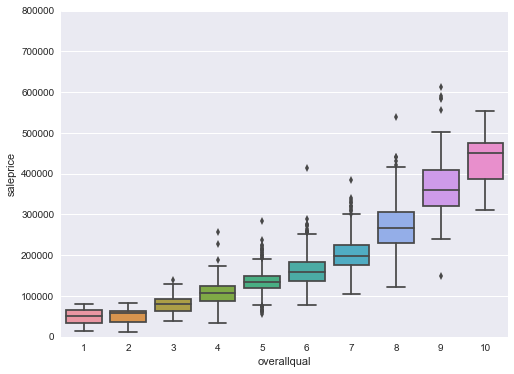

In [13]:
#box plot overallqual/saleprice
var = 'overallqual'
data = pd.concat([train['saleprice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="saleprice", data=data)
fig.axis(ymin=0, ymax=800000);

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


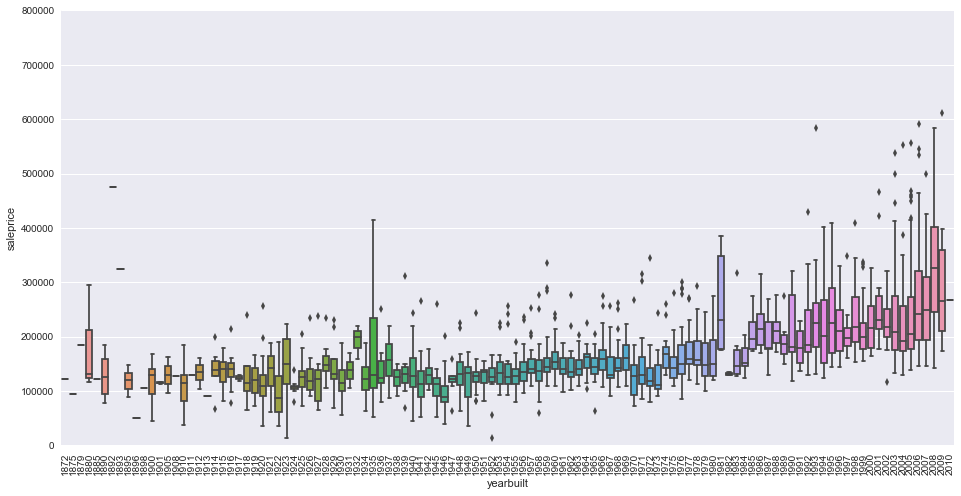

In [14]:
var = 'yearbuilt'
data = pd.concat([train['saleprice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="saleprice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

Note: we don't know if 'SalePrice' is in constant prices. Constant prices try to remove the effect of inflation. If 'SalePrice' is not in constant prices, it should be, so than prices are comparable over the years.

OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

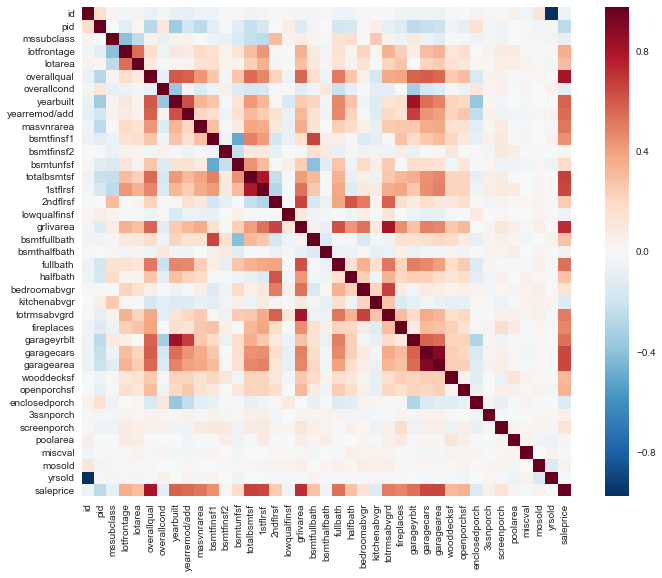

In [15]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9, square=True);

In [16]:
#skewness and kurtosis
print("Skewness: %f" % train['saleprice'].skew())
print("Kurtosis: %f" % train['saleprice'].kurt())

Skewness: 1.556534
Kurtosis: 3.572336


/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


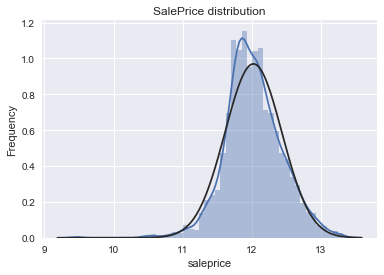

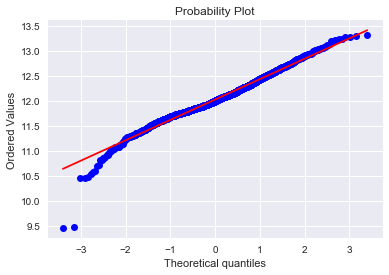

In [17]:
#log transform the target:
from scipy.stats import norm
from scipy import stats
train["saleprice"] = np.log1p(train["saleprice"])

# Kernel Density Plot
sns.distplot(train.saleprice,fit=norm);
plt.ylabel('Frequency')
plt.title('SalePrice distribution');
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['saleprice']);
# QQ-plot
fig = plt.figure()
res = stats.probplot(train['saleprice'], plot=plt)
plt.show()

### _Going after outliers right off the bat_

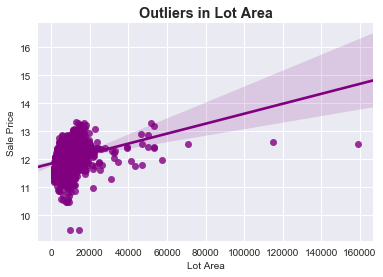

In [18]:
sns.regplot('lotarea', 'saleprice', train, color='purple')
plt.xlabel('Lot Area', fontsize = 'medium')
plt.ylabel('Sale Price', fontsize= 'medium', )
plt.title('Outliers in Lot Area', fontsize= 'x-large', fontweight='bold');

Potential outliers above 100,000
Let's chop them for now

In [19]:
train.loc[train.lotarea > 100000, :]

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,...,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,saleprice
471,2116,906426060,50,RL,NaN,159000,Pave,NaN,IR2,Low,...,0,0,NaN,NaN,Shed,500,6,2007,WD,12.531776
694,2072,905301050,20,RL,NaN,115149,Pave,NaN,IR2,Low,...,0,0,NaN,NaN,NaN,0,6,2007,WD,12.618186


In [20]:
train.drop([471, 694], inplace=True)

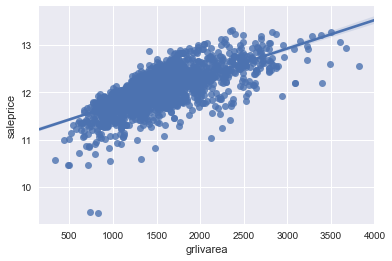

In [21]:
sns.regplot(train.grlivarea, train.saleprice, train);

In [22]:
train.loc[train.grlivarea > 5000, :]

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,...,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,saleprice


### _Let's go NaN hunting_:

In [24]:
train.isnull().sum().sort_values(ascending = False)[:5]

poolqc         2039
miscfeature    1984
alley          1907
fence          1647
fireplacequ    1000
dtype: int64

 Need to impute garage_area and total_bsmt_sf for my building_sq_ft feature

In [25]:
train.garagearea.fillna(train.garagearea.median(), inplace=True)
train.totalbsmtsf.fillna(train.totalbsmtsf.median(), inplace=True)

Next up is lot_frontage, let's take a look at other places in the similar neighborhood.

In [26]:
neigh_frontage_means = train.groupby('neighborhood')['lotfrontage'].mean().to_dict()

In [27]:
neigh_frontage_means

{'Blmngtn': 47.25,
 'Blueste': 27.666666666666668,
 'BrDale': 21.31578947368421,
 'BrkSide': 56.357142857142854,
 'ClearCr': 92.5,
 'CollgCr': 70.75324675324676,
 'Crawfor': 69.27272727272727,
 'Edwards': 64.51181102362204,
 'Gilbert': 72.02564102564102,
 'Greens': 40.0,
 'GrnHill': nan,
 'IDOTRR': 61.890625,
 'Landmrk': nan,
 'MeadowV': 26.80952380952381,
 'Mitchel': 75.47692307692307,
 'NAmes': 75.19245283018869,
 'NPkVill': 27.625,
 'NWAmes': 80.96551724137932,
 'NoRidge': 88.30555555555556,
 'NridgHt': 86.29411764705883,
 'OldTown': 62.802547770700635,
 'SWISU': 58.38709677419355,
 'Sawyer': 72.77464788732394,
 'SawyerW': 70.49333333333334,
 'Somerst': 63.98290598290598,
 'StoneBr': 60.05882352941177,
 'Timber': 78.5945945945946,
 'Veenker': 67.84615384615384}

In [28]:
neigh_frontage_means['Blmngtn']

47.25

In [29]:
train['lotfrontage'].head(20);

In [30]:
# Imputing missing lot_frontage values with the average of one in the same neighborhood.

neigh_frontage_means = train.groupby('neighborhood')['lotfrontage'].mean().to_dict()

train['lot_frontage'] = train.apply(lambda x: neigh_frontage_means[x.neighborhood] if \
                                    np.isnan(x.lotfrontage) else x.lotfrontage, axis=1)

In [31]:
# Still have a couple NaN's, let's decide on what to do...
# Mean and median are very close so I'll do the mean.
train.lot_frontage.fillna(train.lotfrontage.mean(), inplace=True)

### _Let's make some nominal variables:_

In [32]:
# For zoning:

train['ms_zoning'] = train['mszoning'].astype('category')
train = pd.get_dummies(train, columns = ['mszoning'], drop_first = True)

# For neighborhood:

train['neighborhood'] = train['neighborhood'].astype('category')
train = pd.get_dummies(train, columns = ['neighborhood'], drop_first = True)

### _Let's make some ordinal variables:_

In [33]:
simple_qual_encoded = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'NA': 0,
    np.nan: 0
}

train['exter_qual'] = train['exterqual'].map(simple_qual_encoded)
train['exter_cond'] = train['extercond'].map(simple_qual_encoded)
train['bsmt_qual'] = train['bsmtqual'].map(simple_qual_encoded)
train['bsmt_cond'] = train['bsmtcond'].map(simple_qual_encoded)
train['heating_qc'] = train['heating'].map(simple_qual_encoded)
train['kitchen_qual'] = train['kitchenqual'].map(simple_qual_encoded)
train['fireplace_qu'] = train['fireplacequ'].map(simple_qual_encoded)
train['garage_qual'] = train['garagequal'].map(simple_qual_encoded)
train['garage_cond'] = train['garagecond'].map(simple_qual_encoded)
train['pool_qc'] = train['poolqc'].map(simple_qual_encoded)

# Should write a function to "DRY" this up.

### _Let's manufacture some new features:_

In [34]:
# While it's still fresh:
train['overall_simple_qual'] = train.exter_qual + train.exter_cond + train.bsmt_qual + train.bsmt_cond +\
                                train.heating_qc + train.kitchen_qual + train.fireplace_qu + train.garage_qual +\
                                train.garage_cond + train.pool_qc

In [35]:
train['hyper_qual'] = train.overallcond * train.overallqual

train['building_area'] = train.grlivarea + train.totalbsmtsf + train.garagearea

We have our location dummies above

In [36]:
train.loc[train['yearbuilt'] == train['yrsold'], :];
# Want to be making a "New House" variable somehow...

train['new_house'] = (train['yearbuilt'] == train['yrsold']).as_matrix()

new_house_encoded = {
    False: 0,
    True: 1
}
train['new_house'] = train['new_house'].map(new_house_encoded)
train['new_house'].value_counts() # Yay!

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


0    1968
1      79
Name: new_house, dtype: int64

In [37]:
# Want to do the same thing but for a remodeled category:
train.loc[train['yearbuilt'] != train['yearremod/add'], :];
train['remodeled'] = (train['yearbuilt'] != train['yearremod/add']).as_matrix()
train['remodeled'] = train['remodeled'].map(new_house_encoded)

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### _That should be plenty of features, hopefully not too many already..._

### _Let's clean the test data:_

In [38]:
test.garagearea.fillna(test.garagearea.median(), inplace=True)
test.totalbsmtsf.fillna(test.totalbsmtsf.median(), inplace=True)

In [39]:
test['lot_frontage'] = test.apply(lambda x: neigh_frontage_means[x.neighborhood] if np.isnan(x.lotfrontage) else x.lotfrontage, axis=1)

In [40]:
test['ms_zoning'] = test['mszoning'].astype('category')
test = pd.get_dummies(test, columns = ['mszoning'], drop_first = True)

test['neighborhood'] = test['neighborhood'].astype('category')
test = pd.get_dummies(test, columns = ['neighborhood'], drop_first = True)

In [41]:
test['exter_qual'] = test['exterqual'].map(simple_qual_encoded)
test['exter_cond'] = test['extercond'].map(simple_qual_encoded)
test['bsmt_qual'] = test['bsmtqual'].map(simple_qual_encoded)
test['bsmt_cond'] = test['bsmtcond'].map(simple_qual_encoded)
test['heating_qc'] = test['heating'].map(simple_qual_encoded)
test['kitchen_qual'] = test['kitchenqual'].map(simple_qual_encoded)
test['fireplace_qu'] = test['fireplacequ'].map(simple_qual_encoded)
test['garage_qual'] = test['garagequal'].map(simple_qual_encoded)
test['garage_cond'] = test['garagecond'].map(simple_qual_encoded)
test['pool_qc'] = test['poolqc'].map(simple_qual_encoded)

In [42]:
test['overall_simple_qual'] = test.exter_qual + test.exter_cond + test.bsmt_qual + test.bsmt_cond +\
                                test.heating_qc + test.kitchen_qual + test.fireplace_qu + test.garage_qual +\
                                test.garage_cond + test.pool_qc

In [43]:
test['hyper_qual'] = test.overallcond * test.overallqual
test['building_area'] = test.grlivarea + test.totalbsmtsf + test.garagearea

In [44]:
test['new_house'] = (test['yearbuilt'] == test['yrsold']).as_matrix()

new_house_encoded = {
    False: 0,
    True: 1
}
test['new_house'] = test['new_house'].map(new_house_encoded)

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [45]:
test.loc[test['yearbuilt'] != test['yearremod/add'], :]

test['remodeled'] = (test['yearbuilt'] != test['yearremod/add']).as_matrix()

test['remodeled'] = test['remodeled'].map(new_house_encoded)

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### _Poking around our new features:_

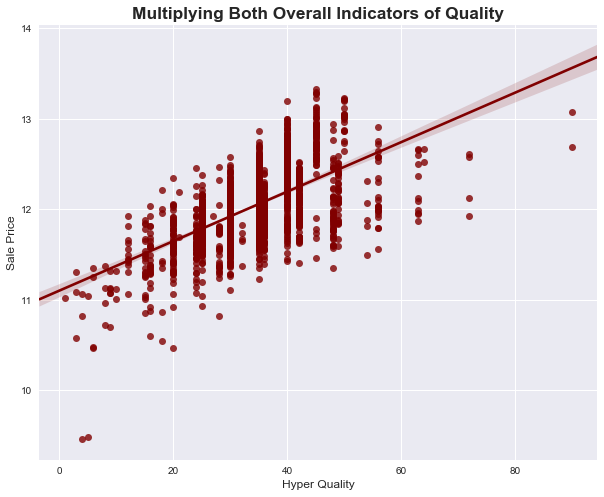

In [46]:
plt.figure(figsize=(10,8))
sns.regplot('hyper_qual', 'saleprice', train, color='maroon')
plt.xlabel('Hyper Quality', fontsize = 'large')
plt.ylabel('Sale Price', fontsize= 'large', )
plt.title('Multiplying Both Overall Indicators of Quality', fontsize= 'xx-large', fontweight='bold')
plt.savefig('hyper_quality.png');

 seems like it is kind of correlated..?

Seems like a very strong pattern that isn't meant for a straight linear regression...

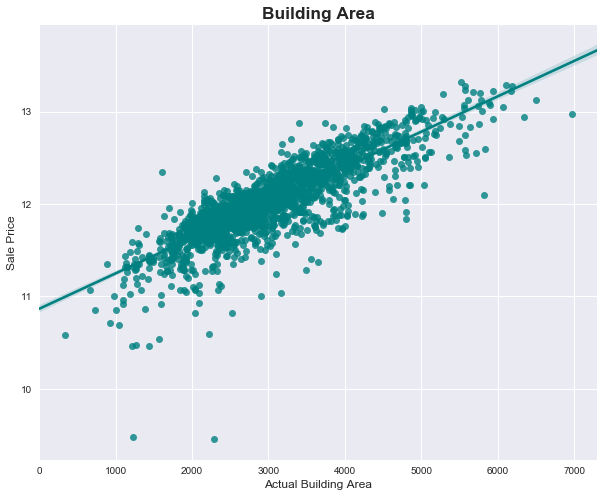

In [47]:
plt.figure(figsize=(10,8))
sns.regplot('building_area', 'saleprice', train, color='teal')
plt.xlabel('Actual Building Area', fontsize = 'large')
plt.ylabel('Sale Price', fontsize= 'large')
plt.title('Building Area', fontsize= 'xx-large', fontweight='bold')
plt.savefig('actual_building_area.png');

Seems like a really good and simplified one.

### _Model time:_ Next notebook on Modeling

# Steps with Explanation

## 1. Load the Data 

* The data comes in three separate CSVs located in `../data/`. 
* Load the CSV into a `DataFrame`. 
* Make sure to check the `.head` or `.sample`. How many rows? How many columns?
* Familiarize yourself with the column names and what they represent.
* Is there a column that can be set as the `index`? If so, set that column as the index when loading the data. (`df.set_index()`)

In [48]:
df = pd.read_csv('./data/train.csv', index_col='Id')

**Bonus:** Write an assertion statement to programmatically verify the correct number of rows and columns were imported.

In [49]:
rows = 0
cols = []
with open('./data/train.csv') as f:
    for row in f:
        rows += 1
        cols.append(len(row.split(',')))
(rows == len(df)+1) & (np.unique(cols) == len(df.columns)+1)

array([ True], dtype=bool)

## 2. Exploratory Data Analysis (EDA)

### A. Data Types

Read the data description on Kaggle. Which variables are numerical and categorical? Are there any columns that can be deleted? 

Make sure the `dtype` of each column is correct. 

**NOTE:** There is one column in particular that should be categorical but will load in pandas as numeric.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
PID              2051 non-null int64
MSSubClass       2051 non-null int64
MSZoning         2051 non-null object
LotFrontage      1721 non-null float64
LotArea          2051 non-null int64
Street           2051 non-null object
Alley            140 non-null object
LotShape         2051 non-null object
LandContour      2051 non-null object
Utilities        2051 non-null object
LotConfig        2051 non-null object
LandSlope        2051 non-null object
Neighborhood     2051 non-null object
Condition1       2051 non-null object
Condition2       2051 non-null object
BldgType         2051 non-null object
HouseStyle       2051 non-null object
OverallQual      2051 non-null int64
OverallCond      2051 non-null int64
YearBuilt        2051 non-null int64
YearRemod/Add    2051 non-null int64
RoofStyle        2051 non-null object
RoofMatl         2051 non-null object
Exterior1st      2051 non-

In [51]:
df.MSSubClass = df.MSSubClass.astype('object')

In [52]:
df_nums = df.select_dtypes(include=['int64', 'float64'])

### B. Plot histograms of the numeric columns. 

In [53]:
# PLOTTING FUNCTION

def house_hist(df=df_nums, rows=18, cols=2):
    fig, axes = plt.subplots(rows, cols, figsize=(20,100))
    label = list(df.columns)
    i = 0
    for row in range(axes.shape[0]):
        for col in range(axes.shape[1]):
            ax = axes[row][col]
            df[label[i]].hist(ax=ax)
            ax.set_title(label[i])
            i += 1
    plt.tight_layout()

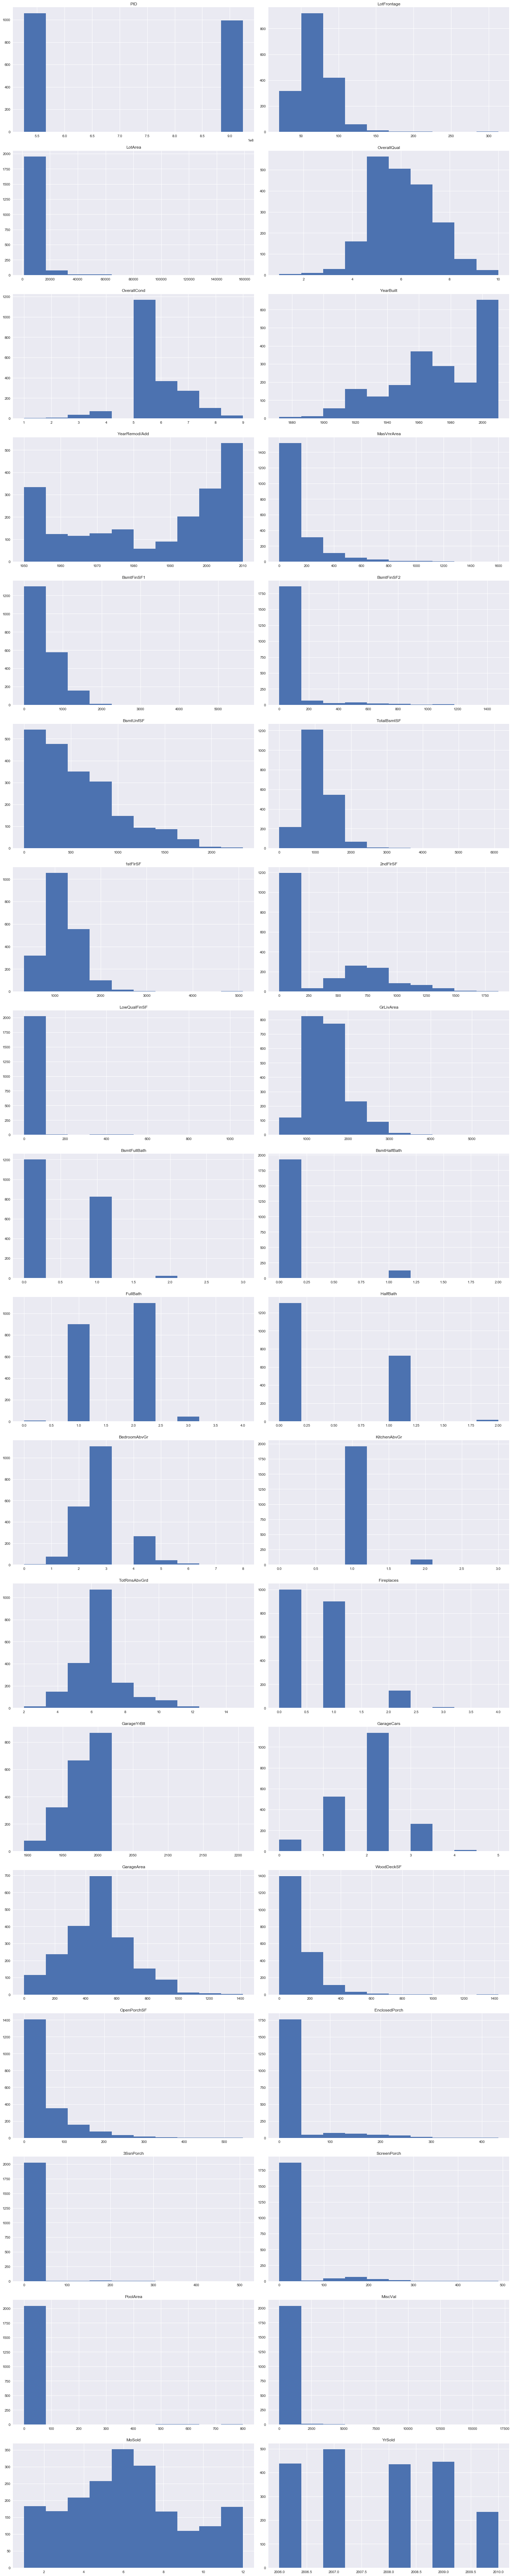

In [54]:
house_hist()

#### What are your observations? Add them to this markdown cell.

---

Many fields have high counts of 0, representing missing features. Some fields have outliers, and almost no fields distribution that appears normal.

### C. Plot the Numeric Columns Against `SalePrice` using scatter plots.

In [55]:
# PLOTTING FUNCTION

def house_scatter(df=df_nums, rows=18, cols=2):
    fig, axes = plt.subplots(rows, cols, figsize=(20,100))
    label = list(df.columns)
    i = 0
    for row in range(axes.shape[0]):
        for col in range(axes.shape[1]):
            ax = axes[row][col]
            df.plot(x=label[i], y='SalePrice', ax=ax, kind='scatter')
            ax.set_title(label[i])
            i += 1
    plt.tight_layout()

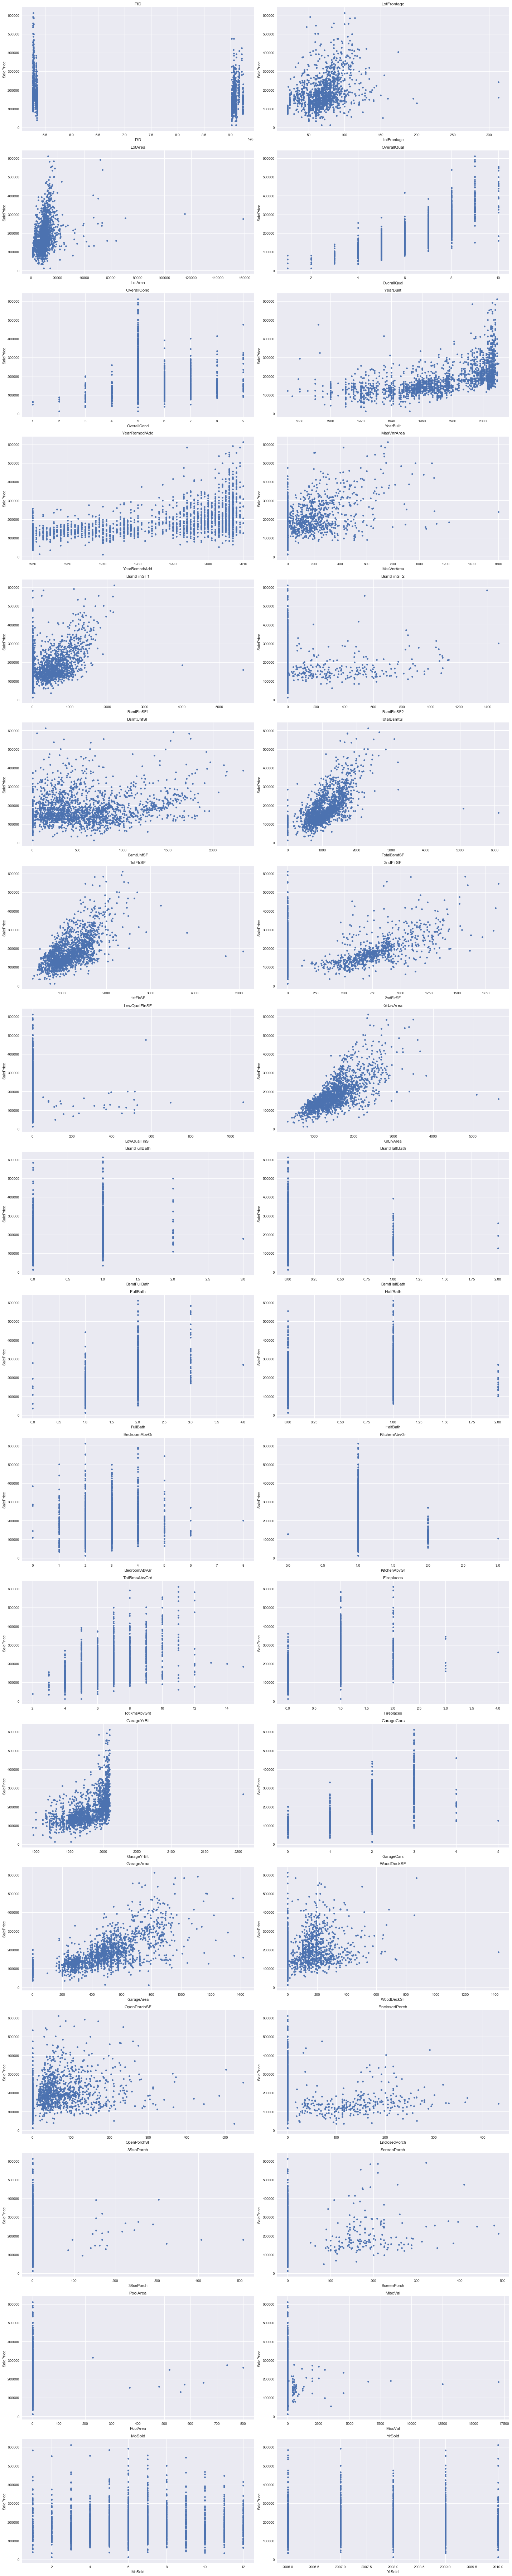

In [56]:
house_scatter()

#### What are your observations? Add them to this markdown cell.

---

Some clear outliers are present in LotFrontage, LotArea, and TotalBsmtSF. Many of the continuous variables appear to have linear relationships with price.

### D. Use bar plots to plot categorical features against `SalePrice`. 

**HINT:** Look up how to create bar plots in `matplotlib`. You will have to transform the data before you can create a bar plot! Also, look up [how to plot error bars](https://pandas.pydata.org/pandas-docs/stable/visualization.html#plotting-with-error-bars) so you can also observe the variability in your data!

In [57]:
# PLOTTING FUNCTION

def house_bar(df=df, rows=22, cols=2):
    fig, axes = plt.subplots(rows, cols, figsize=(20,140))
    label = list(df.select_dtypes(include=['object']).columns)
    i = 0
    for row in range(axes.shape[0]):
        for col in range(axes.shape[1]):
            ax = axes[row][col]
            df.groupby(label[i])['SalePrice'].mean().plot.bar(yerr=df.groupby(label[i])['SalePrice'].std(),ax = ax)
            ax.set_title(label[i])
#             i += 1
    plt.tight_layout()

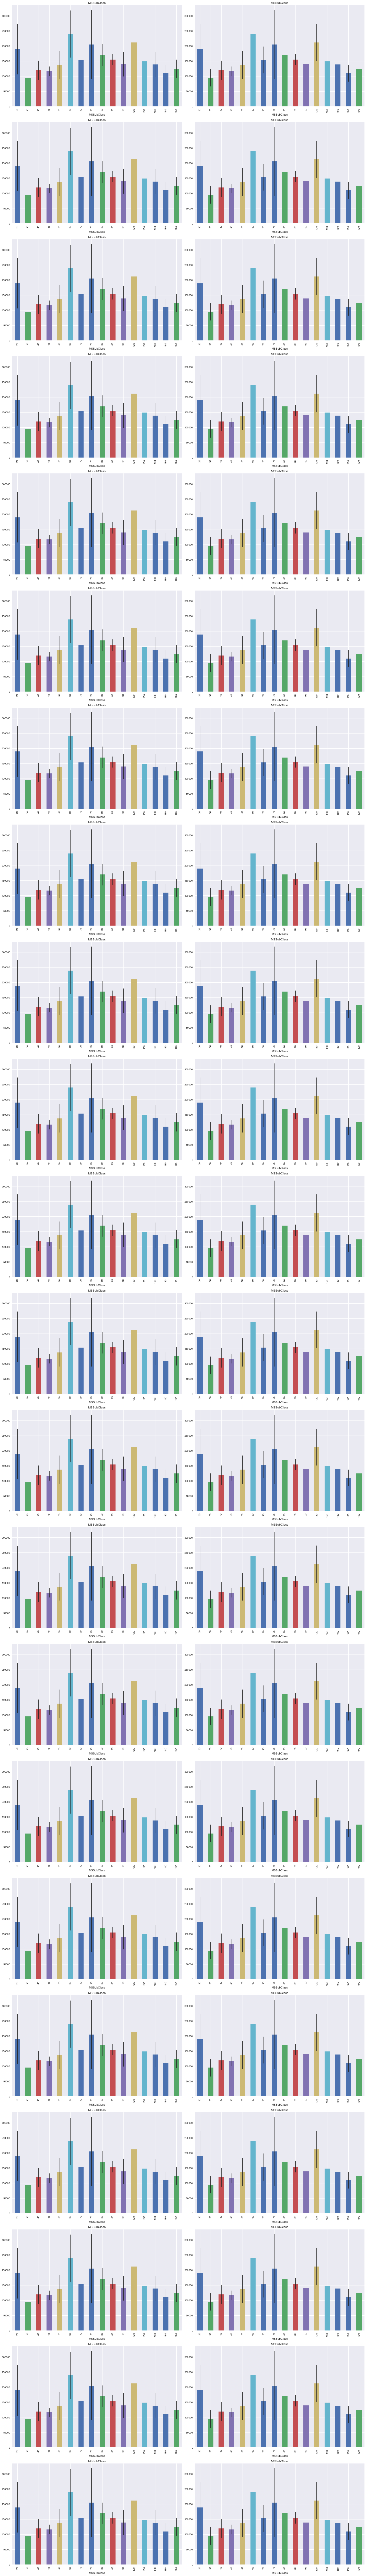

In [58]:
house_bar()

In [62]:
list(train.columns)

['id',
 'pid',
 'mssubclass',
 'lotfrontage',
 'lotarea',
 'street',
 'alley',
 'lotshape',
 'landcontour',
 'utilities',
 'lotconfig',
 'landslope',
 'condition1',
 'condition2',
 'bldgtype',
 'housestyle',
 'overallqual',
 'overallcond',
 'yearbuilt',
 'yearremod/add',
 'roofstyle',
 'roofmatl',
 'exterior1st',
 'exterior2nd',
 'masvnrtype',
 'masvnrarea',
 'exterqual',
 'extercond',
 'foundation',
 'bsmtqual',
 'bsmtcond',
 'bsmtexposure',
 'bsmtfintype1',
 'bsmtfinsf1',
 'bsmtfintype2',
 'bsmtfinsf2',
 'bsmtunfsf',
 'totalbsmtsf',
 'heating',
 'heatingqc',
 'centralair',
 'electrical',
 '1stflrsf',
 '2ndflrsf',
 'lowqualfinsf',
 'grlivarea',
 'bsmtfullbath',
 'bsmthalfbath',
 'fullbath',
 'halfbath',
 'bedroomabvgr',
 'kitchenabvgr',
 'kitchenqual',
 'totrmsabvgrd',
 'functional',
 'fireplaces',
 'fireplacequ',
 'garagetype',
 'garageyrblt',
 'garagefinish',
 'garagecars',
 'garagearea',
 'garagequal',
 'garagecond',
 'paveddrive',
 'wooddecksf',
 'openporchsf',
 'enclosedporch',
 

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


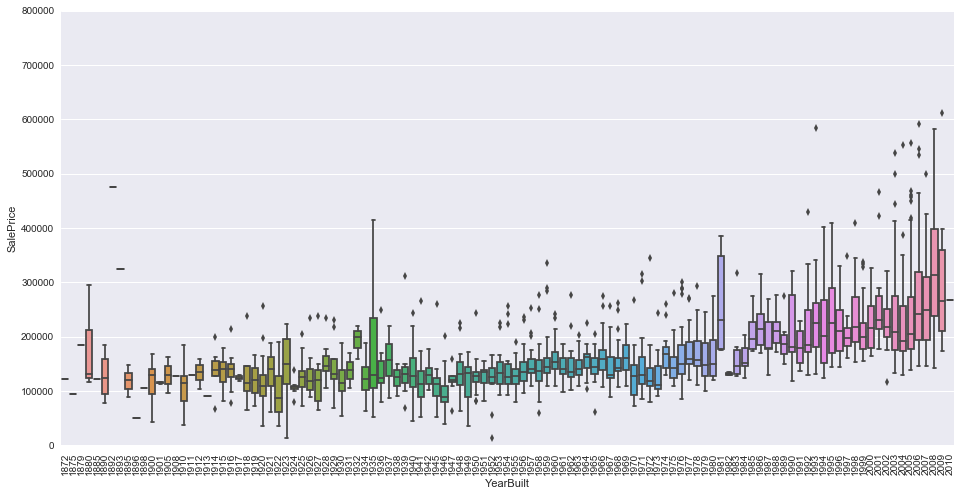

In [63]:
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

#### What are your observations? Add them to this markdown cell.

---


There are few bar plots where the error bars for a category aren't very broad, so even when a mean for a certain feature value seems to suggest a high/low price, this relationship isn't necessarily highly predictive.

## 3. Preprocessing

### A. Identify and Remove Outliers for `SalePrice`

Make sure to... 
* Plot a histogram of the housing price. 
* Supply a definition of what an outlier is by your criteria. Does Tukey's method make sense with 1.5 times the interquartile range, or should that range be increased or decreased?
* Use masking to remove the outliers as you've defined them.

In [64]:
price_iqr = np.percentile(df['SalePrice'], [25, 75])
for threshold in [1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5]:
    upper_fence = float(price_iqr[1] + threshold*np.diff(price_iqr))
    print('Threshold at {}({}): {} ({} houses)'.format(threshold, upper_fence,\
                                       np.mean(df['SalePrice'] >= upper_fence), \
                                       sum(df['SalePrice'] >= upper_fence)))

Threshold at 1.5(340262.5): 0.04583130180399805 (94 houses)
Threshold at 1.75(361306.25): 0.03705509507557289 (76 houses)
Threshold at 2(382350.0): 0.02925402242808386 (60 houses)
Threshold at 2.25(403393.75): 0.02145294978059483 (44 houses)
Threshold at 2.5(424437.5): 0.015602145294978059 (32 houses)
Threshold at 2.75(445481.25): 0.01218917601170161 (25 houses)
Threshold at 3(466525.0): 0.008288639687957094 (17 houses)
Threshold at 3.25(487568.75): 0.006338371526084837 (13 houses)
Threshold at 3.5(508612.5): 0.0048756704046806435 (10 houses)


**Setting threshold at** $$3*IQR$$

In [65]:
df = df[df['SalePrice'] < 466075]

Round outliers down to determined bounds (based on visual analysis)

In [66]:
df.TotalBsmtSF.mask(df['TotalBsmtSF'] > 3500, 3500, inplace=True) 
df.LotArea.mask(df['LotArea'] > 50000, 50000, inplace=True)
df.LotFrontage.mask(df['LotFrontage'] > 200, 200, inplace=True) 

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/pandas/core/generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


### B. Fill missing data!

* How many null values are in each column? Make a bar plot showing this only for columns with missing data.
* For each column with nulls, do nulls represent anything? Read the data description.
  * Some columns that are appearing as _null_ might legitimately be known (ie: "na").  Double check the [data description](../data_description.txt) for proper value representation.  A feature might actually be better represented by "not available" or "na" rather than `NULL` or `NaN`.  There's a difference between `NULL` (unknown), and "NA" (not available).  It might mean the difference between "there isn't a garage" and "there is no garage data". 
* Fill null values for each column by imputation. Here are some common methods for imputation:
  1. Using domain knowledge to select an appropriate value.
  1. Value from a randomly selected row.
  2. Mean, median, or mode value of the series.
  3. Value estimated by a predictive model.
* Make sure to justify your method for filling null values.
  

In [67]:
[column for column in df.columns if np.sum(df[column].isnull()) > 0]

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

**Missing values for Masonary Veneer Area are all houses with NA for Masonary Veneer, so these are filled in with 0 and None, respectively. Missing values for Garage Year Built are houses without garages, so these are filled in with the year the house was built, as this follows the pattern established in the dataset. Missing LotFrontage values are an anomaly, so these are filled in with the mean. The single missing value in Electrical is also anomalous, so is filled with the most frequent value, SBrkr. All other missing values represent the absence of the encoded feature, and so are filled with NA.**

In [68]:
df.Alley.fillna('NA', inplace=True)
df.MasVnrType.fillna('None', inplace=True)
df.MasVnrArea.fillna(0, inplace=True)
df.BsmtQual.fillna('NA', inplace=True)
df.BsmtCond.fillna('NA', inplace=True)
df.BsmtExposure.fillna('NA', inplace=True)
df.BsmtFinType1.fillna('NA', inplace=True)
df.BsmtFinType2.fillna('NA', inplace=True)
df.Electrical.fillna('SBrkr', inplace=True)
df.FireplaceQu.fillna('NA', inplace=True)
df.GarageType.fillna('NA', inplace=True)
df.GarageFinish.fillna('NA', inplace=True)
df.GarageQual.fillna('NA', inplace=True)
df.GarageCond.fillna('NA', inplace=True)
df.PoolQC.fillna('NA', inplace=True)
df.Fence.fillna('NA', inplace=True)
df.MiscFeature.fillna('NA', inplace=True)
df.LotFrontage.fillna(df.LotFrontage.mean(), inplace=True)
df.GarageYrBlt.fillna(df.YearBuilt, inplace=True)

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Verify that you have *truly* eliminated all the null values!

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2033 entries, 109 to 10
Data columns (total 80 columns):
PID              2033 non-null int64
MSSubClass       2033 non-null object
MSZoning         2033 non-null object
LotFrontage      2033 non-null float64
LotArea          2033 non-null int64
Street           2033 non-null object
Alley            2033 non-null object
LotShape         2033 non-null object
LandContour      2033 non-null object
Utilities        2033 non-null object
LotConfig        2033 non-null object
LandSlope        2033 non-null object
Neighborhood     2033 non-null object
Condition1       2033 non-null object
Condition2       2033 non-null object
BldgType         2033 non-null object
HouseStyle       2033 non-null object
OverallQual      2033 non-null int64
OverallCond      2033 non-null int64
YearBuilt        2033 non-null int64
YearRemod/Add    2033 non-null int64
RoofStyle        2033 non-null object
RoofMatl         2033 non-null object
Exterior1st      2033 no

### C. Create dummy variables for categorical columns

Use `pd.get_dummies()` to turn your categorical features into numeric features. Make sure there are **no null values** in your dataset before you do this!

In [70]:
df_dummy = pd.get_dummies(df)

### C2. Combine and Compose variables

Use observations of data to combine and reduce features

In [71]:
df_comp = df[['SalePrice']]

In [72]:
## Combine all porches to get total SF
df['Porch_TotalSF'] = df['ScreenPorch'] + df['3SsnPorch'] + df['EnclosedPorch'] \
                        + df['OpenPorchSF'] + df['WoodDeckSF']

df['TotalBaths'] = df.FullBath + .5*df.HalfBath    
    

df_comp['2Story'] = df['2ndFlrSF'] != 0

df_comp['Artery_Street'] = (df_dummy['Condition1_Artery'] | df_dummy['Condition2_Artery'])

df_comp['Feeder_Street'] = (df_dummy['Condition1_Feedr'] | df_dummy['Condition2_Feedr'])

df_comp['RR'] = (df_dummy['Condition1_RRAe'] | df_dummy['Condition2_RRAe'] |
                 df_dummy['Condition1_RRAn'] | df_dummy['Condition2_RRAn'] |
                 df_dummy['Condition1_RRNe'] | df_dummy['Condition1_RRNn'] | 
                                               df_dummy['Condition2_RRNn'])

df_comp['Near_Park'] = (df_dummy['Condition1_PosA'] | df_dummy['Condition2_PosA'] |
                        df_dummy['Condition1_PosN'] | df_dummy['Condition2_PosN'])

df_comp['Pool'] = (df_dummy['PoolQC_Ex'] | df_dummy['PoolQC_Fa'] |
                   df_dummy['PoolQC_Gd'])

df_comp['Shed'] = df_dummy['MiscFeature_Shed']

df_comp['Garage_Good'] = (df_dummy['GarageQual_Ex'] | df_dummy['GarageQual_Gd'] |
                          df_dummy['GarageCond_Ex'] | df_dummy['GarageCond_Gd'] )

df_comp['Garage_Poor'] = (df_dummy['GarageQual_Fa'] | df_dummy['GarageQual_Po'] |
                          df_dummy['GarageCond_Fa'] | df_dummy['GarageCond_Po'] )

df_comp['Garage_Average'] = ((df_comp['Garage_Good'] | df_comp['Garage_Poor'] 
                            | df_dummy['GarageQual_NA']) == 0) * 1

df_comp['Neighborhood_NPk/Blueste'] = (df_dummy['Neighborhood_Blueste'] | df_dummy['Neighborhood_NPkVill'])

df_comp['LotConfig_FR2+'] = (df_dummy['LotConfig_FR2'] | df_dummy['LotConfig_FR3'])

df_comp['LotShape_IR2+'] = (df_dummy['LotShape_IR2'] | df_dummy['LotShape_IR3'])

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

### C3. Drop Redundant columns

Reducing features

Remove some variables from original DataFrame

In [73]:
df.drop(['GarageQual', 'GarageCond', 'MiscFeature', 'PoolQC', 'Condition1', 'Condition2',
         'FullBath', 'HalfBath', 'ScreenPorch', '3SsnPorch', 'EnclosedPorch', 'OpenPorchSF',
         'WoodDeckSF', '2ndFlrSF'], axis=1, inplace=True)

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Recast with dummy inplace (notice reduced dimensionality)

In [74]:
df = pd.get_dummies(df)

Remove the redundant/modified dummy columns

In [75]:
df.drop(['LotShape_IR2', 'LotShape_IR3', 'LotConfig_FR2', 'LotConfig_FR3',
         'Neighborhood_Blueste', 'Neighborhood_NPkVill'], axis=1, inplace=True)

Add back in composite features.

In [76]:
df = df.merge(df_comp.drop('SalePrice', axis=1), left_index=True, right_index=True)

In [77]:
df.shape

(2033, 281)

### D. Split your data into a train and test set.

* Use `train_test_split` to hold out a test set. 
* Why do we hold out a test set?

In [79]:
y = df['SalePrice']

In [80]:
X = df.drop('SalePrice', axis=1)

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

We hold out a test set because we need to understand how our model performs on data it hasn't seen. We may create a model that fits our training data very well but does not score well on the test set, suggesting that it won't predict well given new data. With a test set, we can understand how our model performs on unseen data.